In [1]:
!pip install opencv-python
!pip install keras
!pip install tensorflow
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
#from google.colab.patches import cv2_imshow
import cv2
import os
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


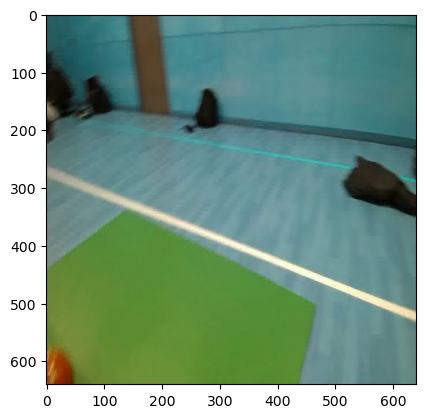

In [2]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

ruta_directorio = "train"
ruta_csv = "_classes2.csv"

# Leer el archivo CSV utilizando pandas
df = pd.read_csv(ruta_csv)

# Diccionario para almacenar los valores de la segunda y tercera columna del CSV
valores_csv = {}
# Llenar el diccionario con los valores del CSV
for index, row in df.iterrows():
    nombre_imagen = row['filename'].split('.')[0]  # Eliminar la extensión para comparar con la imagen
    valores_csv[nombre_imagen] = (row['blue_ball'], row['purple_ball'], row['red_ball'])

# Lista para almacenar las imágenes y sus etiquetas
imagenes = []
etiquetas1=[]
etiquetas = {}

# Iterar sobre los archivos en el directorio
for archivo in os.listdir(ruta_directorio):
    # Verificar si el archivo es una imagen JPG
    if archivo.endswith(".jpg"):
        #print(valores_csv[archivo.split('.')[0]])

        # Leer la imagen utilizando OpenCV
        ruta_imagen = os.path.join(ruta_directorio, archivo)
        imagen = cv2.imread(ruta_imagen)
        # Agregar la imagen a la lista
        if imagen is not None:
            imagenes.append(imagen)
            # Obtener la etiqueta correspondiente del archivo CSV
            nombre_imagen = archivo.split('.')[0]  # Eliminar la extensión para buscar en el diccionario
            if nombre_imagen in valores_csv:
                etiquetas1.append(valores_csv[archivo.split('.')[0]])
                etiquetas[archivo.split('.')[0]]=(valores_csv[archivo.split('.')[0]])
            else:
                print(f"No se encontraron etiquetas para la imagen: {nombre_imagen}")
        else:
            print(f"No se pudo leer la imagen: {ruta_imagen}")

# Ahora puedes acceder a tus imágenes y etiquetas correspondientes
# Por ejemplo, para mostrar la primera imagen y su etiqueta:
if imagenes:
    plt.imshow(imagenes[0])
    #print("Etiqueta de la imagen:", etiquetas[0])
else:
    print("No se encontraron imágenes en el directorio especificado.")




In [3]:
#print(etiquetas)

In [4]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def custom_load_data(imgArray, etiquetas, test_size=0.2, target_size=(80, 80)):
  """
  Splits the image array `imgArray` and label array `etiquetas` into training and testing sets.

  Args:
      imgArray (np.ndarray): The NumPy array containing the images.
      etiquetas (np.ndarray): A NumPy array containing the labels for each image.
      test_size (float, optional): The proportion of data to be used for the testing set. Defaults to 0.2.
      target_size (tuple, optional): The target size to resize the images to. Defaults to (80, 80).

  Returns:
      tuple: A tuple containing four elements:
          - x_train (np.ndarray): The training set of images.
          - y_train (np.ndarray): The training set of labels.
          - x_test (np.ndarray): The testing set of images.
          - y_test (np.ndarray): The testing set of labels.
  """

  # Split the data
  x_train, x_test, y_train, y_test = train_test_split(imgArray, etiquetas, test_size=test_size)

  # Resize the images
  x_train_resized = [cv2.resize(img, target_size) for img in x_train]
  x_test_resized = [cv2.resize(img, target_size) for img in x_test]

  # Convert to NumPy arrays
  x_train_resized = np.array(x_train_resized)
  x_test_resized = np.array(x_test_resized)

  # No need to assume a single class anymore, use the actual labels
  y_train = y_train
  y_test = y_test

  return (x_train_resized, y_train), (x_test_resized, y_test)

# Assuming you have loaded your images into a list called 'imagenes'

# Convert the list of images to a NumPy array
imgArray = np.asarray(imagenes)
etiquetas1 = np.asarray(etiquetas1)

# Use the custom function to split data and create labels
(x_train, y_train), (x_test, y_test) = custom_load_data(imgArray, etiquetas1)

# Normalize the data
# x_train = np.divide(x_train.astype('float32'), 255.0)
# x_test = np.divide(x_test.astype('float32'), 255.0)

# Normalize the data
x_train = np.divide(x_train, 255.0)
x_test = np.divide(x_test, 255.0)

# Print the shapes of the arrays
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (967, 80, 80, 3)
y_train shape: (967, 3)
x_test shape: (242, 80, 80, 3)
y_test shape: (242, 3)


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=3,
                 kernel_size=(3,3),
                 strides= (1,1),
                 padding='same',
                 input_shape = (80, 80, 3),
                 activation = 'relu'
                 ))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=3,
                 kernel_size=(3,3),
                 strides= (1,1),
                 padding='same',
                 activation = 'relu'
                 ))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=3,
                 kernel_size=(3,3),
                 strides= (1,1),
                 padding='same',
                 activation = 'relu'
                 ))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=3,
                 kernel_size=(3,3),
                 strides= (1,1),
                 padding='same',
                 activation = 'relu'
                 ))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=3,
                 kernel_size=(3,3),
                 strides= (1,1),
                 padding='same',
                 activation = 'relu'
                 ))

model.add(MaxPooling2D(2,2))




model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 80, 80, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 40, 40, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 3)        │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459 (1.79 KB)

 Trainable params: 459 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.fit(x_train, y_train, epochs=200, batch_size=12, validation_data=(x_test, y_test))

Epoch 1/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.3432 - loss: 1.1074 - val_accuracy: 0.4752 - val_loss: 1.0841
Epoch 2/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4832 - loss: 1.0796 - val_accuracy: 0.4752 - val_loss: 1.0659
Epoch 3/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4775 - loss: 1.0210 - val_accuracy: 0.4752 - val_loss: 0.8394
Epoch 4/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4937 - loss: 0.7613 - val_accuracy: 0.4752 - val_loss: 0.8080
Epoch 5/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5113 - loss: 0.7050 - val_accuracy: 0.6818 - val_loss: 0.7953
Epoch 6/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6727 - loss: 0.7157 - val_accuracy: 0.6777 - val_loss: 0.7915
Epoch 7/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6958 - loss: 0.6704 - val_accuracy: 0.6694 - val_loss: 0.7824
Epoch 8/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7022 - loss: 0.6557 - val_accuracy: 0

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7222 - loss: 0.4620 - val_accuracy: 0.6736 - val_loss: 0.8507
Epoch 52/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7790 - loss: 0.4014 - val_accuracy: 0.6901 - val_loss: 0.8836
Epoch 53/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7615 - loss: 0.4526 - val_accuracy: 0.6736 - val_loss: 0.8452
Epoch 54/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7508 - loss: 0.4346 - val_accuracy: 0.6818 - val_loss: 0.8620
Epoch 55/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7543 - loss: 0.4461 - val_accuracy: 0.6446 - val_loss: 0.8644
Epoch 56/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7309 - loss: 0.4436 - val_accuracy: 0.6777 - val_loss: 0.8845
Epoch 57/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7398 - loss: 0.4299 - val_accuracy: 0.6860 - val_loss: 0.8776
Epoch 58/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7610 - loss: 0.4209 - val_accuracy: 0.6818 

81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7989 - loss: 0.3737 - val_accuracy: 0.7025 - val_loss: 1.0108
Epoch 102/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8040 - loss: 0.3972 - val_accuracy: 0.6777 - val_loss: 0.9971
Epoch 103/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8244 - loss: 0.3680 - val_accuracy: 0.6942 - val_loss: 0.9970
Epoch 104/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7912 - loss: 0.3830 - val_accuracy: 0.6983 - val_loss: 0.9960
Epoch 105/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7773 - loss: 0.4080 - val_accuracy: 0.6901 - val_loss: 1.0022
Epoch 106/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7969 - loss: 0.3964 - val_accuracy: 0.6860 - val_loss: 1.0284
Epoch 107/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7911 - loss: 0.3952 - val_accuracy: 0.6777 - val_loss: 1.0083
Epoch 108/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8068 - loss: 0.3665 - val_accuracy: 

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8599 - loss: 0.3301 - val_accuracy: 0.7273 - val_loss: 1.1798
Epoch 152/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8647 - loss: 0.3163 - val_accuracy: 0.7355 - val_loss: 1.1777
Epoch 153/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8474 - loss: 0.3397 - val_accuracy: 0.7314 - val_loss: 1.2053
Epoch 154/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8429 - loss: 0.3317 - val_accuracy: 0.7273 - val_loss: 1.1900
Epoch 155/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8556 - loss: 0.3486 - val_accuracy: 0.7355 - val_loss: 1.2264
Epoch 156/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8659 - loss: 0.3128 - val_accuracy: 0.7727 - val_loss: 1.1600
Epoch 157/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8588 - loss: 0.3169 - val_accuracy: 0.7438 - val_loss: 1.2514
Epoch 158/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8697 - loss: 0.3030 - val_accuracy: 

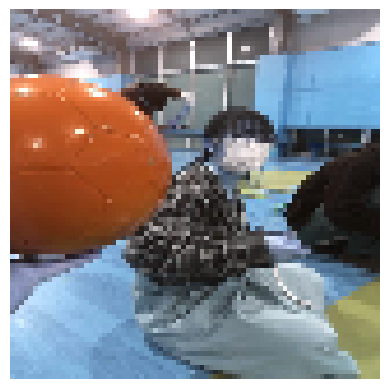

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[1 0 0]
[[1 0 0]]


In [9]:
import matplotlib.pyplot as plt
import random
num = random.randint(1, 241)
img = x_test[num]
label = y_test[num]

plt.imshow(img)
plt.axis('off')
plt.show()


out = model.predict(img.reshape(1,80,80,3))

print(label)
# print(out)
v = np.round(out).astype(int)
print(v)
# print(y_test)
# print(np.argmax(out))